In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from joblib import dump, load

from preset_function import evaluate_model, draw_learning_curve, load_processed_data

X_train_bow, X_test_bow, X_train_tfidf, X_test_tfidf, \
    X_train_bow_L1, X_test_bow_L1, X_train_tfidf_L1, X_test_tfidf_L1 = load_processed_data('input')

y_train, y_test = load_processed_data('output')

%matplotlib inline

Select dataset:

In [3]:
X_train = X_train_tfidf
X_test = X_test_tfidf

# Basic training

In [66]:
softmax_model = LogisticRegression(multi_class='multinomial')
softmax_model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

Score of on train are:
	- Accuracy score: 0.9442
	- Micro F1 score: 0.9442
	- Macro F1 score: 0.9143
Score of on test are:
	- Accuracy score: 0.8253
	- Micro F1 score: 0.8253
	- Macro F1 score: 0.7504


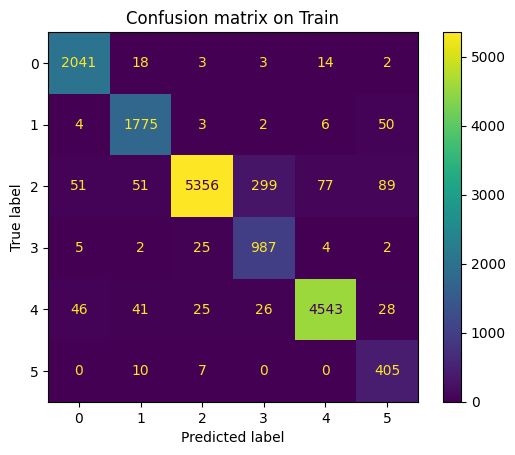

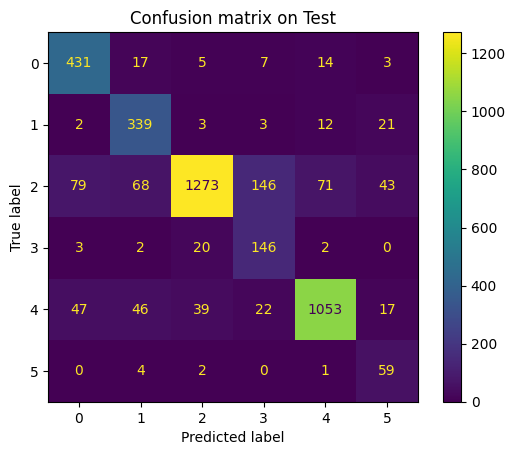

In [67]:
evaluate_model(softmax_model, X_train, X_test, y_train, y_test, include_training=True)

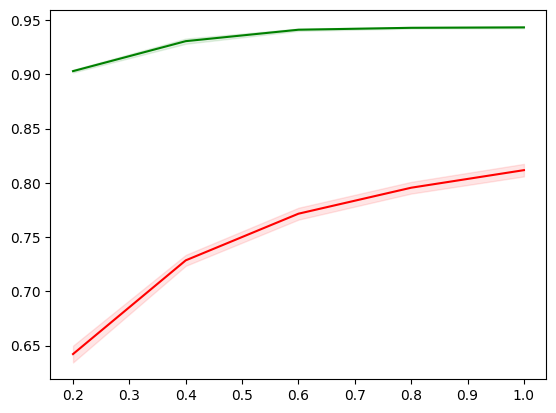

In [68]:
draw_learning_curve(softmax_model, X_train, y_train)

# Multiple tuning

## No regularization

In [69]:
softmax_model = LogisticRegression(penalty=None, solver='lbfgs', multi_class='multinomial')
softmax_model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', penalty=None)

Score of on train are:
	- Accuracy score: 0.9924
	- Micro F1 score: 0.9924
	- Macro F1 score: 0.9903
Score of on test are:
	- Accuracy score: 0.8675
	- Micro F1 score: 0.8675
	- Macro F1 score: 0.8305


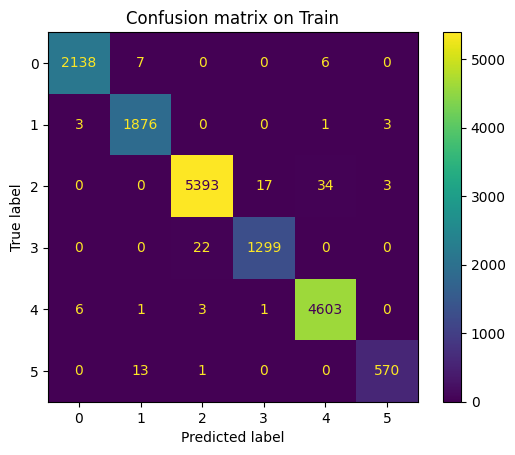

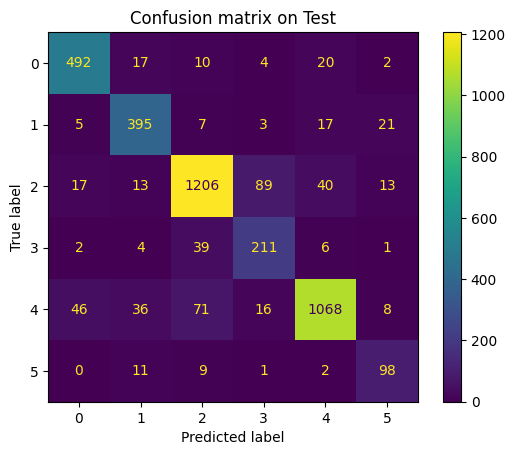

In [70]:
evaluate_model(softmax_model, X_train, X_test, y_train, y_test, include_training=True)

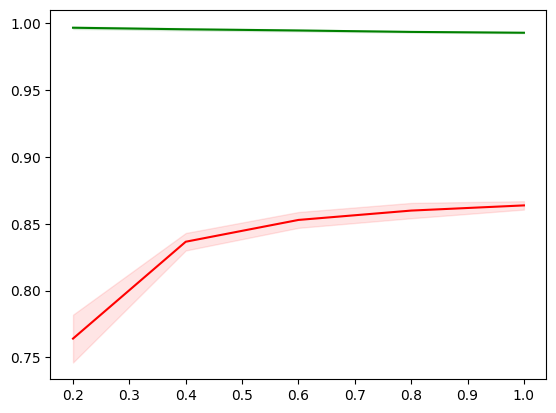

In [71]:
draw_learning_curve(softmax_model, X_train, y_train)

## L1 regularization

First, we try to plot the validation score through a list of C from 0.001 to 100

In [72]:
C_list = [0.001, 0.01, 0.1, 1, 5, 10, 100]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    softmax_model = LogisticRegression(C=c, penalty='l1', solver='saga', multi_class='multinomial')
    softmax_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, softmax_model.predict(X_train))
    cv_score = np.mean(cross_val_score(softmax_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.001, 0.01, 0.1, 1, 5, 10, 100]
[0.3386875, 0.3386875, 0.5438125, 0.88425, 0.971375, 0.992625, 0.992625]
[0.329, 0.3386875000000001, 0.4031874999999999, 0.8634375000000001, 0.8772500000000001, 0.875875, 0.870125]


[Text(0, 0, '0.001'),
 Text(1, 0, '0.01'),
 Text(2, 0, '0.1'),
 Text(3, 0, '1'),
 Text(4, 0, '5'),
 Text(5, 0, '10'),
 Text(6, 0, '100')]

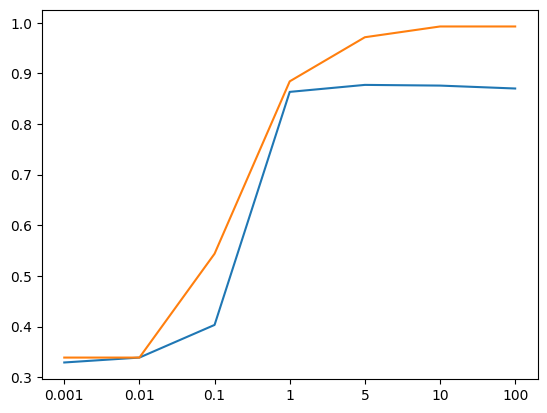

In [73]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We can see the good value of $C$ is near $C = 5$, then we scope to $C=5$:

In [74]:
C_list = [2, 3, 4, 4.5, 5, 5.5, 6, 7]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    softmax_model = LogisticRegression(C=c, penalty='l1', solver='saga', multi_class='multinomial')
    softmax_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, softmax_model.predict(X_train))
    cv_score = np.mean(cross_val_score(softmax_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[2, 3, 4, 4.5, 5, 5.5, 6, 7]
[0.904625, 0.9281875, 0.9533125, 0.9629375, 0.97125, 0.9780625, 0.9829375, 0.989375]
[0.8749375, 0.8763124999999998, 0.8772499999999999, 0.8770625000000001, 0.8773125, 0.8768750000000001, 0.8763750000000001, 0.8758125]


[Text(0, 0, '2'),
 Text(1, 0, '3'),
 Text(2, 0, '4'),
 Text(3, 0, '4.5'),
 Text(4, 0, '5'),
 Text(5, 0, '5.5'),
 Text(6, 0, '6'),
 Text(7, 0, '7')]

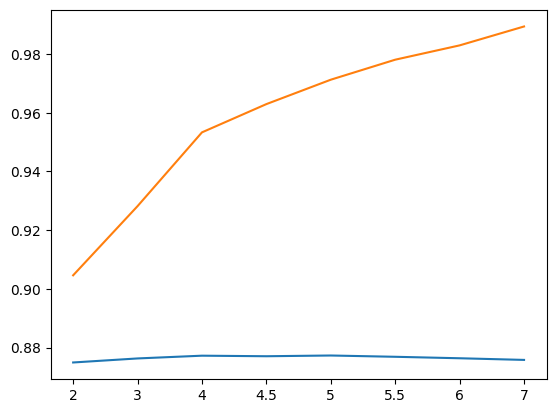

In [75]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We choose $C=5$ to be the best model.

In [76]:
best_l1_softmax_model = LogisticRegression(C=5, penalty='l1', solver='saga', multi_class='multinomial')

Score of on train are:
	- Accuracy score: 0.9714
	- Micro F1 score: 0.9714
	- Macro F1 score: 0.9621
Score of on test are:
	- Accuracy score: 0.8808
	- Micro F1 score: 0.8808
	- Macro F1 score: 0.8493


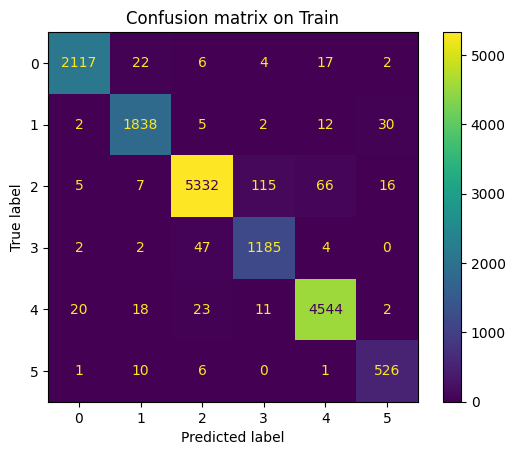

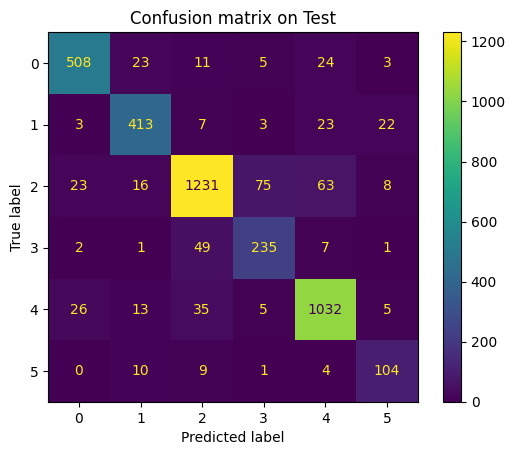

In [77]:
best_l1_softmax_model.fit(X_train, y_train)
evaluate_model(best_l1_softmax_model, X_train, X_test, y_train, y_test, include_training=True)

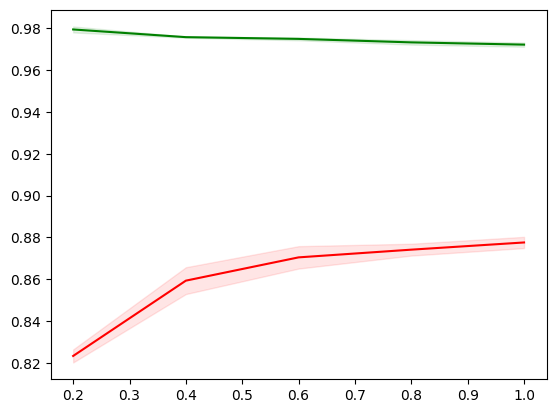

In [78]:
draw_learning_curve(best_l1_softmax_model, X_train, y_train)

## L2 regularization

In [81]:
C_list = [0.001, 0.01, 0.1, 1, 5, 10, 100, 200]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    softmax_model = LogisticRegression(C=c, penalty='l2', solver='lbfgs', multi_class='multinomial')
    softmax_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, softmax_model.predict(X_train))
    cv_score = np.mean(cross_val_score(softmax_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.001, 0.01, 0.1, 1, 5, 10, 100, 200]
[0.3386875, 0.381625, 0.6619375, 0.9441875, 0.99125, 0.9920625, 0.992625, 0.9921875]
[0.3386875000000001, 0.36025, 0.6044375, 0.811625, 0.8478125000000001, 0.8535, 0.86075, 0.8615]


[Text(0, 0, '0.001'),
 Text(1, 0, '0.01'),
 Text(2, 0, '0.1'),
 Text(3, 0, '1'),
 Text(4, 0, '5'),
 Text(5, 0, '10'),
 Text(6, 0, '100'),
 Text(7, 0, '200')]

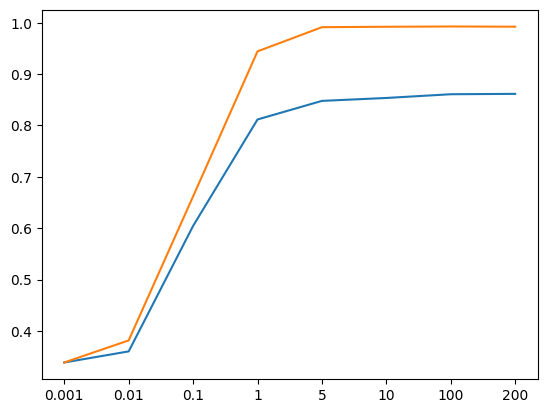

In [82]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We can see the good value of $C$ is near $C = 100$, then we scope to $C=100$:

In [4]:
C_list = [90, 95, 98, 99, 100, 101, 102, 105, 110]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    softmax_model = LogisticRegression(C=c, penalty='l2', solver='lbfgs', multi_class='multinomial')
    softmax_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, softmax_model.predict(X_train))
    cv_score = np.mean(cross_val_score(softmax_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[90, 95, 98, 99, 100, 101, 102, 105, 110]
[0.992625, 0.992625, 0.992125, 0.99225, 0.992625, 0.992625, 0.992625, 0.992625, 0.9925625]
[0.8595624999999998, 0.8609375, 0.8618124999999999, 0.8612499999999998, 0.86075, 0.8590625, 0.8603124999999998, 0.8618750000000001, 0.8619375]


[Text(0, 0, '90'),
 Text(1, 0, '95'),
 Text(2, 0, '98'),
 Text(3, 0, '99'),
 Text(4, 0, '100'),
 Text(5, 0, '101'),
 Text(6, 0, '102'),
 Text(7, 0, '105'),
 Text(8, 0, '110')]

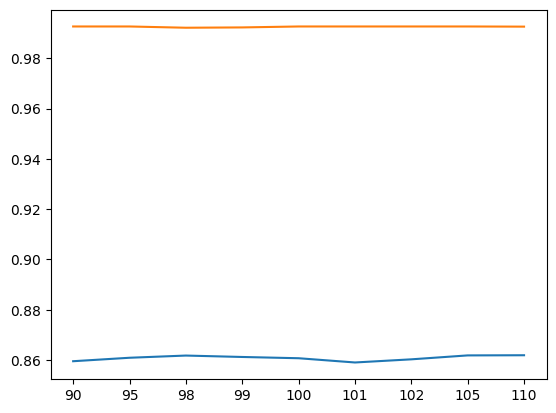

In [5]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We choose $C=110$ to be the best model.

In [13]:
best_l2_softmax_model = LogisticRegression(C=110, penalty='l2', solver='lbfgs', multi_class='multinomial')

Score of on train are:
	- Accuracy score: 0.9926
	- Micro F1 score: 0.9926
	- Macro F1 score: 0.9904
Score of on test are:
	- Accuracy score: 0.8692
	- Micro F1 score: 0.8692
	- Macro F1 score: 0.8304


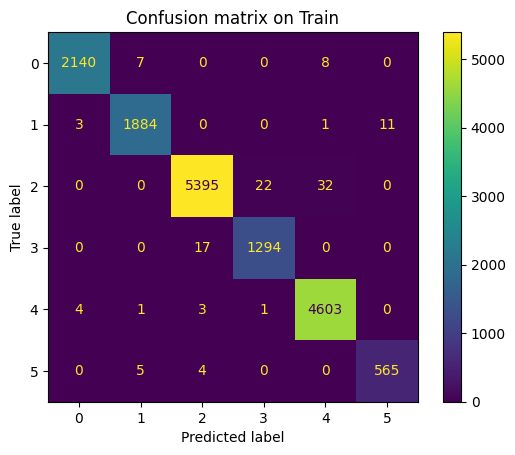

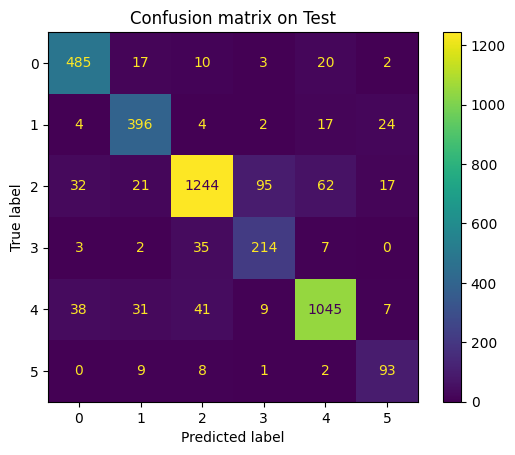

In [14]:
best_l2_softmax_model.fit(X_train, y_train)
evaluate_model(best_l2_softmax_model, X_train, X_test, y_train, y_test, include_training=True)

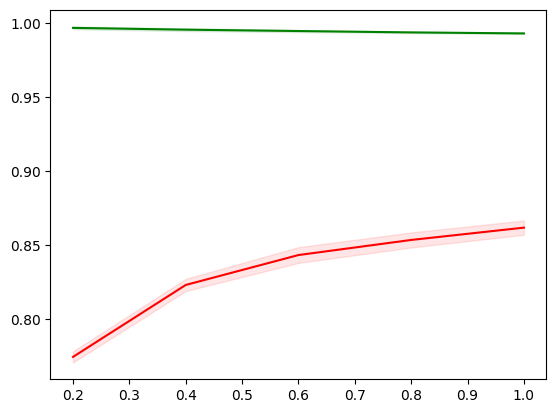

In [15]:
draw_learning_curve(best_l2_softmax_model, X_train, y_train)

## Elastic regularization

In [16]:
dict_param = {
    'C' : [0.001, 0.01, 0.1, 1, 5, 10, 100],
    'l1_ratio' : np.linspace(0.1, 0.9, 5)
}

softmax_model = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='multinomial')
grid_search = GridSearchCV(softmax_model, dict_param, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='multinomial',
                                          penalty='elasticnet', solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],
                         'l1_ratio': array([0.1, 0.3, 0.5, 0.7, 0.9])},
             scoring='accuracy')

In [17]:
df = pd.DataFrame(
  dict(
    C = [val['C'] for val in grid_search.cv_results_['params']],
    l1_ratio = [val['l1_ratio'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)
df = df[df['score'] < 0.8]
print("Bad hyperparameter:")
for param in dict_param:
  for value in dict_param[param]:
    if len(df[df[param] == value]) == 35 // len(dict_param[param]):
      print(param, value)

Bad hyperparameter:
C 0.001
C 0.01
C 0.1


In [18]:
dict_param = {
    'C' : np.logspace(0, 2, 5),
    'l1_ratio' : np.linspace(0.1, 0.9, 5)
}

softmax_model = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='multinomial')
grid_search = GridSearchCV(softmax_model, dict_param, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='multinomial',
                                          penalty='elasticnet', solver='saga'),
             n_jobs=-1,
             param_grid={'C': array([  1.        ,   3.16227766,  10.        ,  31.6227766 ,
       100.        ]),
                         'l1_ratio': array([0.1, 0.3, 0.5, 0.7, 0.9])},
             scoring='accuracy')

In [19]:
df = pd.DataFrame(
  dict(
    C = [val['C'] for val in grid_search.cv_results_['params']],
    l1_ratio = [val['l1_ratio'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)
print(df)

             C  l1_ratio     score
0     1.000000       0.1  0.821063
1     1.000000       0.3  0.831812
2     1.000000       0.5  0.839813
3     1.000000       0.7  0.848938
4     1.000000       0.9  0.861063
5     3.162278       0.1  0.849187
6     3.162278       0.3  0.859062
7     3.162278       0.5  0.866500
8     3.162278       0.7  0.871562
9     3.162278       0.9  0.876250
10   10.000000       0.1  0.857062
11   10.000000       0.3  0.864437
12   10.000000       0.5  0.869438
13   10.000000       0.7  0.872188
14   10.000000       0.9  0.875313
15   31.622777       0.1  0.858938
16   31.622777       0.3  0.864375
17   31.622777       0.5  0.867563
18   31.622777       0.7  0.869813
19   31.622777       0.9  0.872750
20  100.000000       0.1  0.860750
21  100.000000       0.3  0.862750
22  100.000000       0.5  0.865313
23  100.000000       0.7  0.867750
24  100.000000       0.9  0.868375


In [20]:
print(grid_search.best_estimator_, grid_search.best_score_)

LogisticRegression(C=3.1622776601683795, l1_ratio=0.9,
                   multi_class='multinomial', penalty='elasticnet',
                   solver='saga') 0.87625


In [21]:
best_en_softmax_model = LogisticRegression(C=3.1622776601683795, l1_ratio=0.9,
                   multi_class='multinomial', penalty='elasticnet',
                   solver='saga')

Score of on train are:
	- Accuracy score: 0.9329
	- Micro F1 score: 0.9329
	- Macro F1 score: 0.9098
Score of on test are:
	- Accuracy score: 0.8810
	- Micro F1 score: 0.8810
	- Macro F1 score: 0.8473


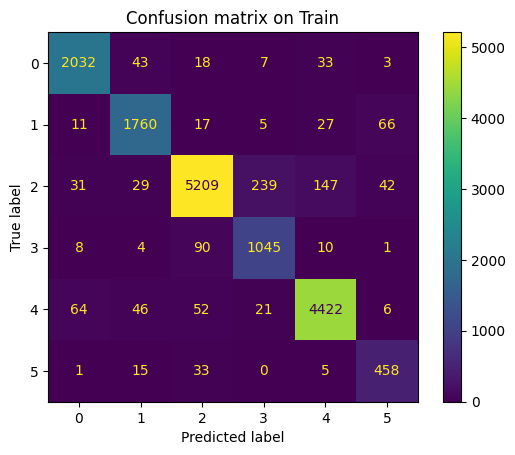

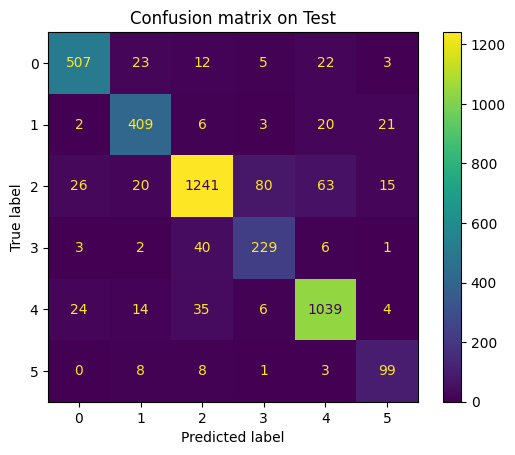

In [22]:
best_en_softmax_model.fit(X_train, y_train)
evaluate_model(best_en_softmax_model, X_train, X_test, y_train, y_test, include_training=True)

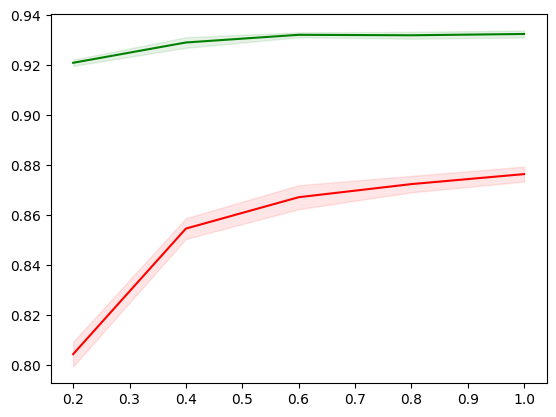

In [23]:
draw_learning_curve(best_en_softmax_model, X_train, y_train)

# Conclusion

There are a few difference among the accuracy of these 3 regularization. However, Elastic-net regularization gives the best performance then I will choose it to be the best model in this notebook.

In [25]:
best_softmax_model = best_en_softmax_model

In [26]:
directory = "data/models/softmax/"

dump(best_softmax_model, directory + "best_softmax_tfidf_model.joblib")

['data/models/softmax/best_softmax_tfidf_model.joblib']